In [29]:
import json
import math
import requests
from gdal import ogr
from shapely.geometry import Point, MultiPoint, Polygon, mapping
import geopandas
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import ast

### --- Climate Data Store (CDS) ---
https://cds.climate.copernicus.eu/cdsapp#!/home

In [23]:
#https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=overview
#https://cds.climate.copernicus.eu/api-how-to
#requires specifying the certificate

import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': 'total_evaporation',
        'year': '2021',
        'month': '05',
        'day': '15',
        'time': '14:00',
        'area': [
            40.26, 43.84, 39.81,
            44.68,
        ],
        'format': 'netcdf',
    },
    'download.nc')

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
2023-03-29 23:26:55,992 INFO Welcome to the CDS
2023-03-29 23:26:55,995 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
2023-03-29 23:26:56,224 INFO Request is completed
2023-03-29 23:26:56,224 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data4/adaptor.mars.i

Result(content_length=1308,content_type=application/x-netcdf,location=https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data4/adaptor.mars.internal-1680094137.4640117-15473-6-71a96827-47d5-4878-83fb-838134cde1de.nc)

### --- Soilgrids ---
https://soilgrids.org/

In [33]:
test = ogr.Open(r'C:\Users\rost8\OneDrive\Desktop\DP National Trust Tasks/Boundary National Trust Land Cover.geojson')
in_layer = test.GetLayer()


In [35]:
shp_ulx, shp_lrx, shp_lry, shp_uly = in_layer.GetExtent()
shp_res = ext[1]
# Set the need pixel extent of your future raster mask, according to the image resolution
mask_ncol = round((shp_lrx - shp_ulx)/shp_res)
mask_nrow = round((shp_uly - shp_lry)/shp_res)
# Set the upper-left corner coordinates and a resolution of your future raster mask: y with minus sign
mask_ext = ulx, xres, uls, uly, lrs, yres = (shp_ulx, shp_res, 0.0, shp_uly, 0.0, -shp_res)
lrx = ulx + (mask_ncol * xres)
lry = uly + (mask_nrow * yres)
bbox = (ulx, uly, lrx, lry)

NameError: name 'ext' is not defined

In [ ]:
res = 250
cols, rows = ...

In [28]:
# Reprojection to wgs84 required
# Use SoilGrids().map_services to get the list of soil parameters (service_id) and SoilGrids().get_coverage_list to get the list of layers within the parameter (coverage_id)
"""
The soil class from the returned tif value is according to the python index of the list below - begins from 0
wrb_soil_classes = [Acrisols, Albeluvisols, Alisols, Andosols, Arenosols, Calcisols, 
                    Cambisols, Chernozems, Cryosols, Durisols, Ferralsols, Fluvisols, 
                    Gleysols, Gypsisols, Histosols, Kastanozems, Leptosols, Lixisols, 
                    Luvisols, Nitisols, Phaeozems, Planosols, Plinthosols, Podzols, 
                    Regosols, Solonchaks, Solonetz, Stagnosols, Umbrisols, Vertisols]
"""
from soilgrids import SoilGrids



soil_grids = SoilGrids()
SoilGrids()
param = []
data = soil_grids.get_coverage_data(service_id='soc', coverage_id='soc_5-15cm_mean', 
                                       west=lyr_ext[0], south=lyr_ext[2], east=lyr_ext[1], north=lyr_ext[3],  width=1000, height=1000, 
                                       crs='urn:ogc:def:crs:EPSG::4326',output='soilgrid_NT_soc_5-15cm_mean.tif')

### insert the calculation of the size of a picture using conversion of coordinates to pixels
### insert the cropping the image using shapefile

In [26]:
from soilgrids import SoilGrids

soil_grids = SoilGrids()
data = soil_grids.get_coverage_data(service_id='soc', coverage_id='soc_5-15cm_mean', 
                                       west=lyr_ext[0], south=lyr_ext[2], east=lyr_ext[1], north=lyr_ext[3], 
                                       crs='urn:ogc:def:crs:EPSG::152160',output='soilgrid_NT_soc_5-15cm_mean.tif')

Exception: WCS sever error 
<?xml version='1.0' encoding="UTF-8" ?>
<ServiceExceptionReport version="1.2.0"
xmlns="http://www.opengis.net/ogc" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.opengis.net/ogc http://schemas.opengis.net/wcs/1.0.0/OGC-exception.xsd">
  <ServiceException>msImageCreate(): Image handling error. Attempt to allocate raw image failed, out of memory.
  </ServiceException>
</ServiceExceptionReport>


In [10]:
from soilgrids import SoilGrids
src = SoilGrids().map_services

service id: bdod 
variable name: Bulk density 
service link: https://maps.isric.org/mapserv?map=/map/bdod.map

service id: cec 
variable name: Citation exchange capacity at ph7 
service link: https://maps.isric.org/mapserv?map=/map/cec.map

service id: cfvo 
variable name: Coarse fragments volumetric 
service link: https://maps.isric.org/mapserv?map=/map/cfvo.map

service id: clay 
variable name: Clay content 
service link: https://maps.isric.org/mapserv?map=/map/clay.map

service id: nitrogen 
variable name: Nitrogen 
service link: https://maps.isric.org/mapserv?map=/map/nitrogen.map

service id: phh2o 
variable name: Soil pH in H2O 
service link: https://maps.isric.org/mapserv?map=/map/phh2o.map

service id: sand 
variable name: Sand content 
service link: https://maps.isric.org/mapserv?map=/map/sand.map

service id: silt 
variable name: Silt content 
service link: https://maps.isric.org/mapserv?map=/map/silt.map

service id: soc 
variable name: Soil organic carbon content 
service l

TypeError: 'NoneType' object is not subscriptable

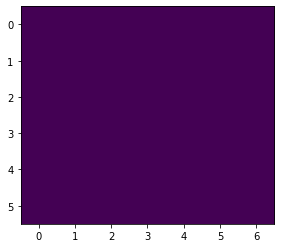

In [44]:
plt.imshow(data[0])

### --- Soil and Landscape Grids for Australia ---
https://esoil.io/TERNLandscapes/Public/Pages/SLGA/

In [46]:
#The url for requesting of the value by pair of coordinates for a single location
y = requests.get('https://esoil.io/TERNLandscapes/RasterProductsAPI/Drill?format=json&verbose=false&COGPath=https://esoil.io/TERNLandscapes/Public/Products/TERN/SLGA/30m/SOC/SOC_030_060_05_N_P_AU_TRN_N_20220727_30m.tif&latitude=-27&longitude=150')
#y = requests.get(f'https://esoil.io/TERNLandscapes/RasterProductsAPI/Drill?format=json&verbose=false&COGPath=https://esoil.io/TERNLandscapes/Public/Products/TERN/SLGA/30m/SOC/SOC_030_060_05_N_P_AU_TRN_N_20220727_30m.tif&latitude={-34.14314240028746}&longitude={139.94172243585845}')

In [2]:
#Testing of an image generation on a basis of single requests for SLGA for a polygon
"""
ul = [139.93768, -34.1398]
ur = [139.94028, -34.1391]
lr = [139.94246, -34.1439]
ll = [139.93952, -34.14462]
"""

ul = [139, -34]
ur = [139.1, -34]
lr = [139.1, -34.1]
ll = [139, -34.1]


poly = Polygon([ul, ur, lr, ll])
polygon = geopandas.GeoSeries([poly ]).__geo_interface__
with open('mygeojson.geojson', 'w') as f:
    json.dump(polygon, f)
    
test_geo1 = ogr.Open('mygeojson.geojson')
in_layer = test_geo1.GetLayer()
ext = in_layer.GetExtent()

In [3]:
#Boundaries of a new image
dd_width = ext[1] - ext[0]
width = 40075 * 1000 * (ext[1] - ext[0]) * math.cos((ext[3] - ext[2])/2)/360
dd_height = ext[3] - ext[2]
height  = (ext[3] - ext[2])*111.32*1000
#Set 90/30 m for Australian TERN data or 250 m for Soilgrid data
w_step = dd_width * (250/width)
h_step = dd_height * (250/height)
w_cols = dd_width/w_step
h_cols = dd_width/h_step

In [66]:
#requesting all values within the bbox: test for image generation of Aus soil grid data
l = []
for i in range(round(w_cols)): 
    for j in range(round(h_cols)):
        row = (ext[0]+j*w_step,  ext[3]-i*h_step)
        l.append(row)

l1 = []        
for i in l:
    y = requests.get(f'https://esoil.io/TERNLandscapes/RasterProductsAPI/Drill?format=json&verbose=false&COGPath=https://esoil.io/TERNLandscapes/Public/Products/TERN/SLGA/30m/SOC/SOC_030_060_05_N_P_AU_TRN_N_20220727_30m.tif&latitude={i[1]}&longitude={i[0]}')
    l1.append(ast.literal_eval(y.content.decode())[0]['Value'])

In [4]:
#OR: requesting all values within the bbox: test for image generation of soilgrid data
l = []
for i in range(round(w_cols)): 
    for j in range(round(h_cols)):
        row = (ext[0]+j*w_step,  ext[3]-i*h_step)
        l.append(row)

l1 = []
props = {"property":"silt","depth":"0-5cm","value":"mean"}
for i in l:

    p1={"lat":i[1],"lon":i[0]}
    y = requests.get(f"https://rest.isric.org/soilgrids/v2.0/properties/query", params={**p1 , **props})
    l1.append(y.json()['properties']["layers"][0]["depths"][0]["values"]['mean'])

In [42]:
slga_vals = np.array(l1).reshape(round(w_cols), round(h_cols))

In [22]:
# Exporting the final tif
# Set the correct coordinates of the bounding box!
transform = rasterio.transform.from_bounds(139, -34.1, 139.1, -34, slga_vals.shape[0], slga_vals.shape[1])

with rasterio.open(r'soil grids.tif', 'w', driver='GTiff', # soil grids
                   width=slga_vals.shape[0], height=slga_vals.shape[1],
                   count=1, dtype=slga_vals.astype(float).dtype, nodata=0,
                   transform=transform) as dst:
    dst.write(slga_vals, indexes=1)

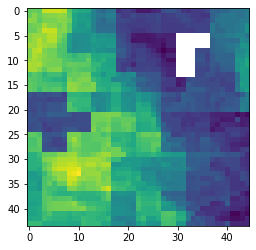

In [17]:
plt.imshow(slga_vals.astype(float))

### --- OpenTopography --- (DEM)
https://opentopography.org/

In [27]:
#The commands for requesting the values of the global elevation parameter for a single location. NB: no data for urban areas
#https://portal.opentopography.org/apidocs/#/Public/getGlobalDem

OT_Api_Key = 'demoapikeyot2022'
north, west, south, east = [-34, 140.4, -34.1, 140.5]
demtype = 'SRTMGL1'

rest_url = f"https://portal.opentopography.org/API/globaldem?demtype={demtype}&south={south}&north={north}&west={west}&east={east}&outputFormat=GTiff&API_Key={OT_Api_Key}"

x = requests.get(rest_url)

In [41]:
with open('DEM_test.tif', 'wb') as f:
    f.write(x.content)

###  --- USDA Cropland layer ---
https://www.nass.usda.gov/Research_and_Science/Cropland/SARS1a.php

In [ ]:
# https://nassgeodata.gmu.edu/CropScape/devhelp/help.html
# Example and the link for GET requests
x = requests.get('https://nassgeodata.gmu.edu/axis2/services/CDLService/GetCDLValue?year=2019&x=1551565.363&y=1909363.537')
print(x.status_code)

In [3]:
year = '2008'
l = []
#All input coordinates must be in the projection of USA Contiguous Albers Equal Area Conic (USGS version), units - meters
pts = [(-1194827.99, 2833352.516),(-1176486.362,2292837.29),(610035.2881, 1591114.615),(642333.1021, 1587698.91)]
for i in pts:
    x = requests.get(f'https://nassgeodata.gmu.edu/axis2/services/CDLService/GetCDLValue?year={year}&x={i[0]}&y={i[1]}')
    l.append([x.content])